In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h1>Import Students Perfomance Data</h1>

In [4]:
std = pd.read_csv('Dataset/StudentsPerformance.csv')
std.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
std = std.rename(columns={"gender":"Gender","race/ethnicity":"Group","parental level of education":"Education","lunch":"Lunch","test preparation course":"Course Completation","math score":"Math Score","reading score":"Reading Score","writing score":"Writing Score"})
std.head(5)

,Gender,Group,Education,Lunch,Course Completation,Math Score,Reading Score,Writing Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h1>Scatter Plot</h1>

Text(0,0.5,'Writing Score')

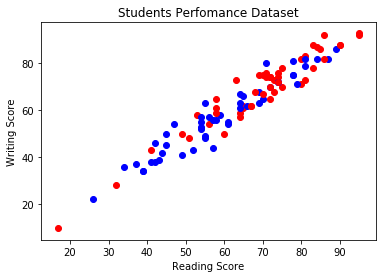

In [12]:
#create color dictionary
colors = {'female':'red','male':'blue'}

#create a figure and axis
#fig -> ax
fig, ax = plt.subplots()

#scatter the x, y
#scatter the reading score and writing score
for i in range(0,100):
    ax.scatter(std['Reading Score'][i], std['Writing Score'][i], color=colors[std['Gender'][i]])
ax.set_title('Students Perfomance Dataset')
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')

<h1>Line Chart</h1>

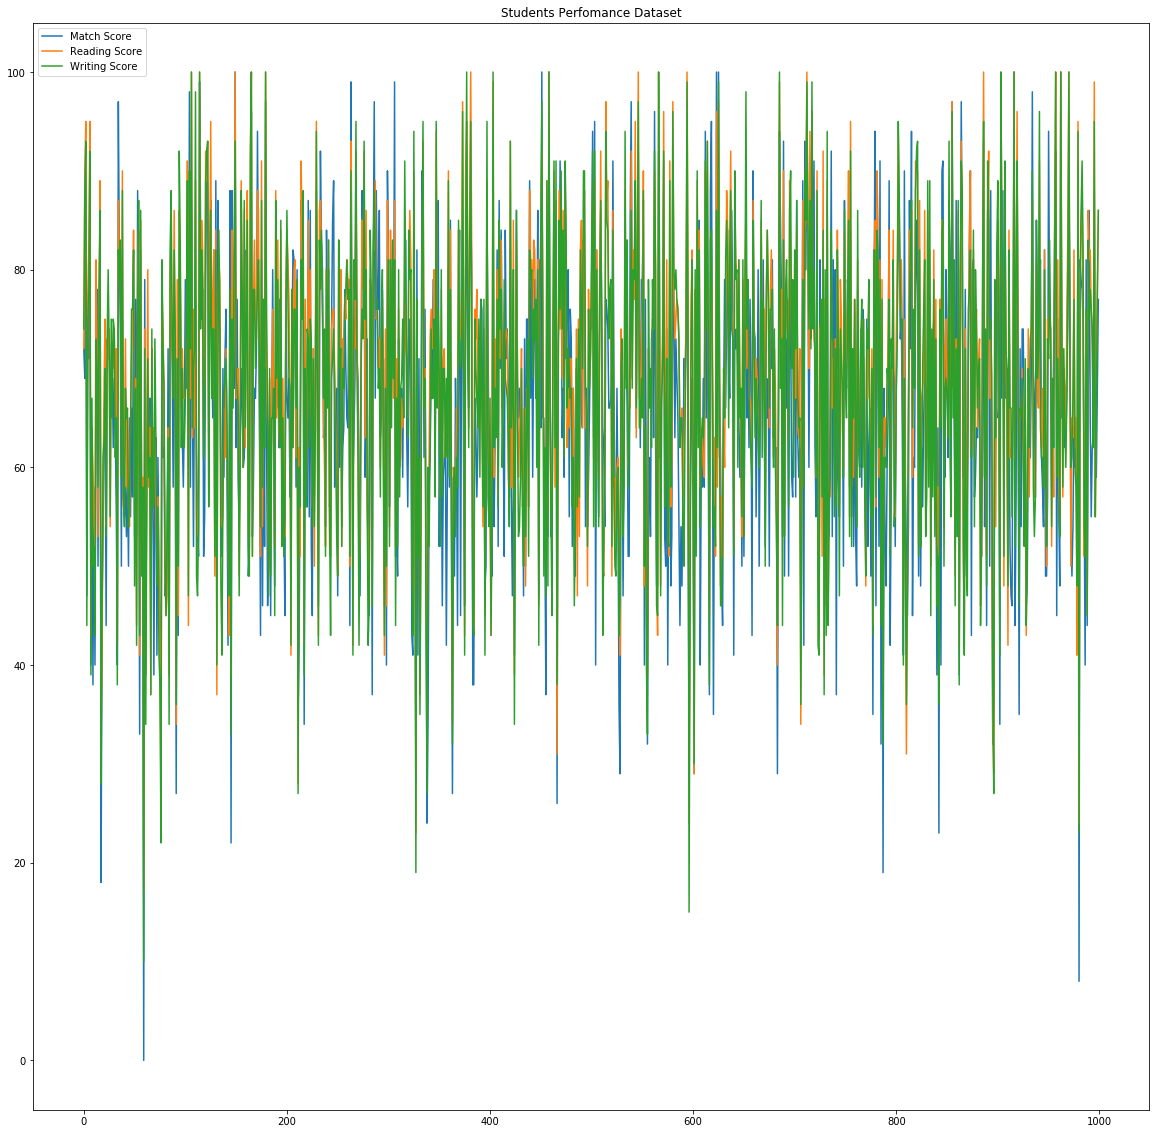

In [74]:
#get columns to plot
columns = std.columns.drop(['Course Completation', 'Group', 'Lunch', 'Education', 'Gender'])
#create x data
x_data = range(0, std.shape[0])
#create figure and axis
fig, ax = plt.subplots(figsize=(20,20))
#plot each column
for column in columns:
    ax.plot(x_data, std[column], label = column)
#set title and legend
ax.set_title('Students Perfomance Dataset')
ax.legend()

<h1>Histogram</h1>

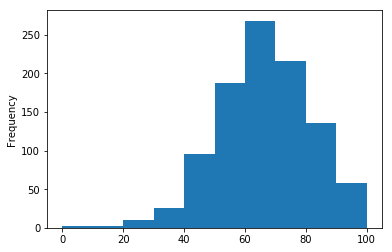

In [85]:
std['Math Score'].plot.hist()

<h1>Multiple Histogram</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FF41AC8>,
      dtype=object)

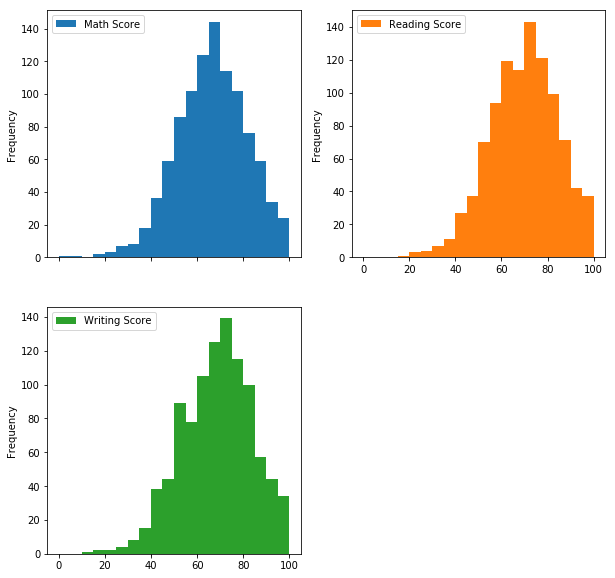

In [93]:
std.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

<h1>Bar Chart</h1>

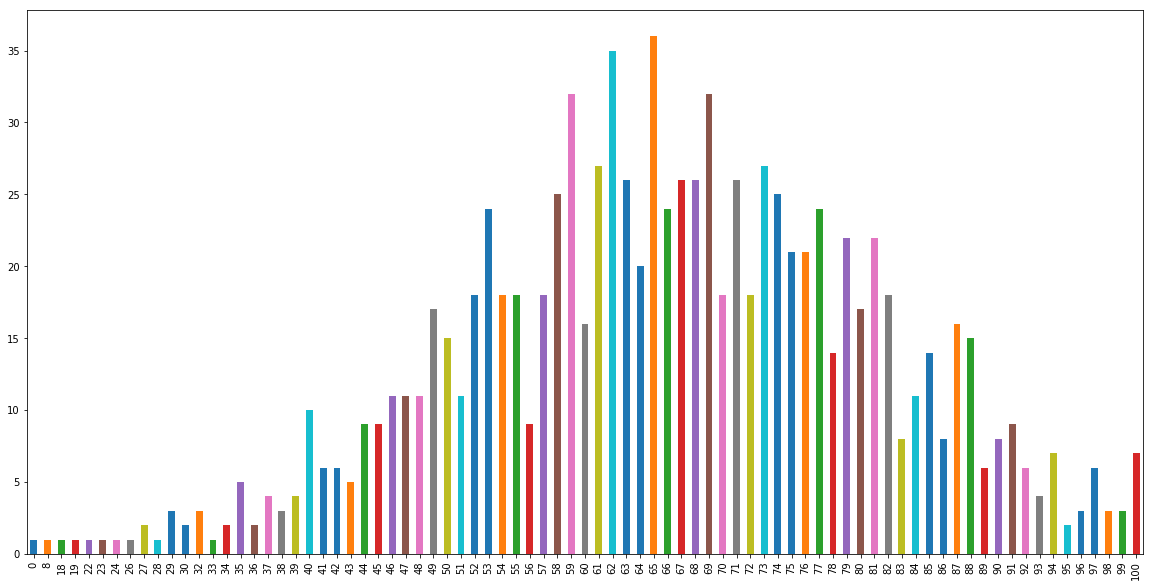

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
std['Math Score'].value_counts().sort_index().plot.bar()

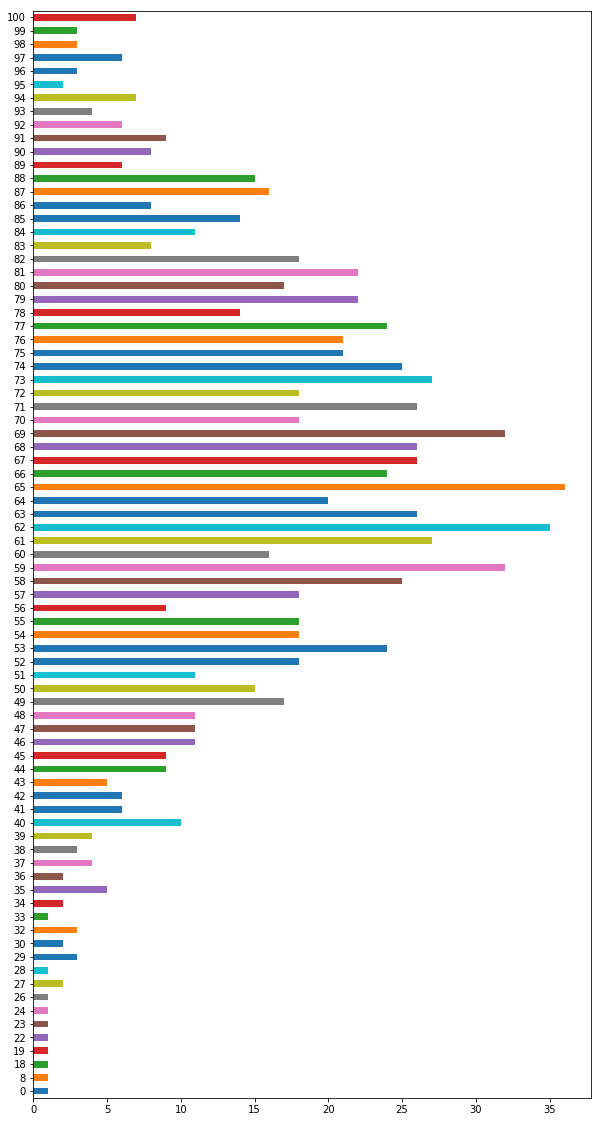

In [105]:
fig, ax = plt.subplots(figsize=(10,20))
std['Math Score'].value_counts().sort_index().plot.barh()

<h1>Categorical Bar Chart</h1>

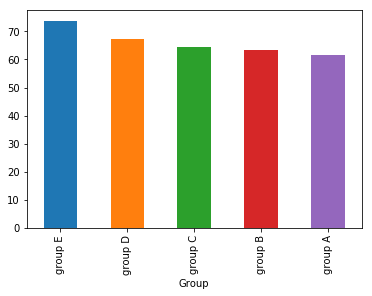

In [114]:
std.groupby('Group').Math_Score.mean().sort_values(ascending=False)[:5].plot.bar()

<h1>Scatterplot</h1>

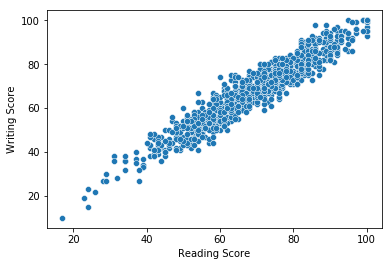

In [13]:
sns.scatterplot(x='Reading Score', y='Writing Score', data=std)

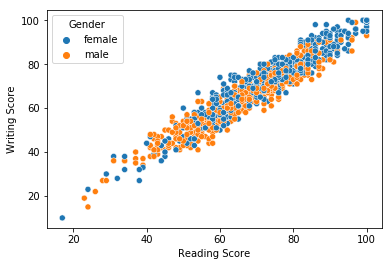

In [16]:
sns.scatterplot(x='Reading Score', y='Writing Score', hue='Gender', data=std)

<h1>Line Chart</h1>


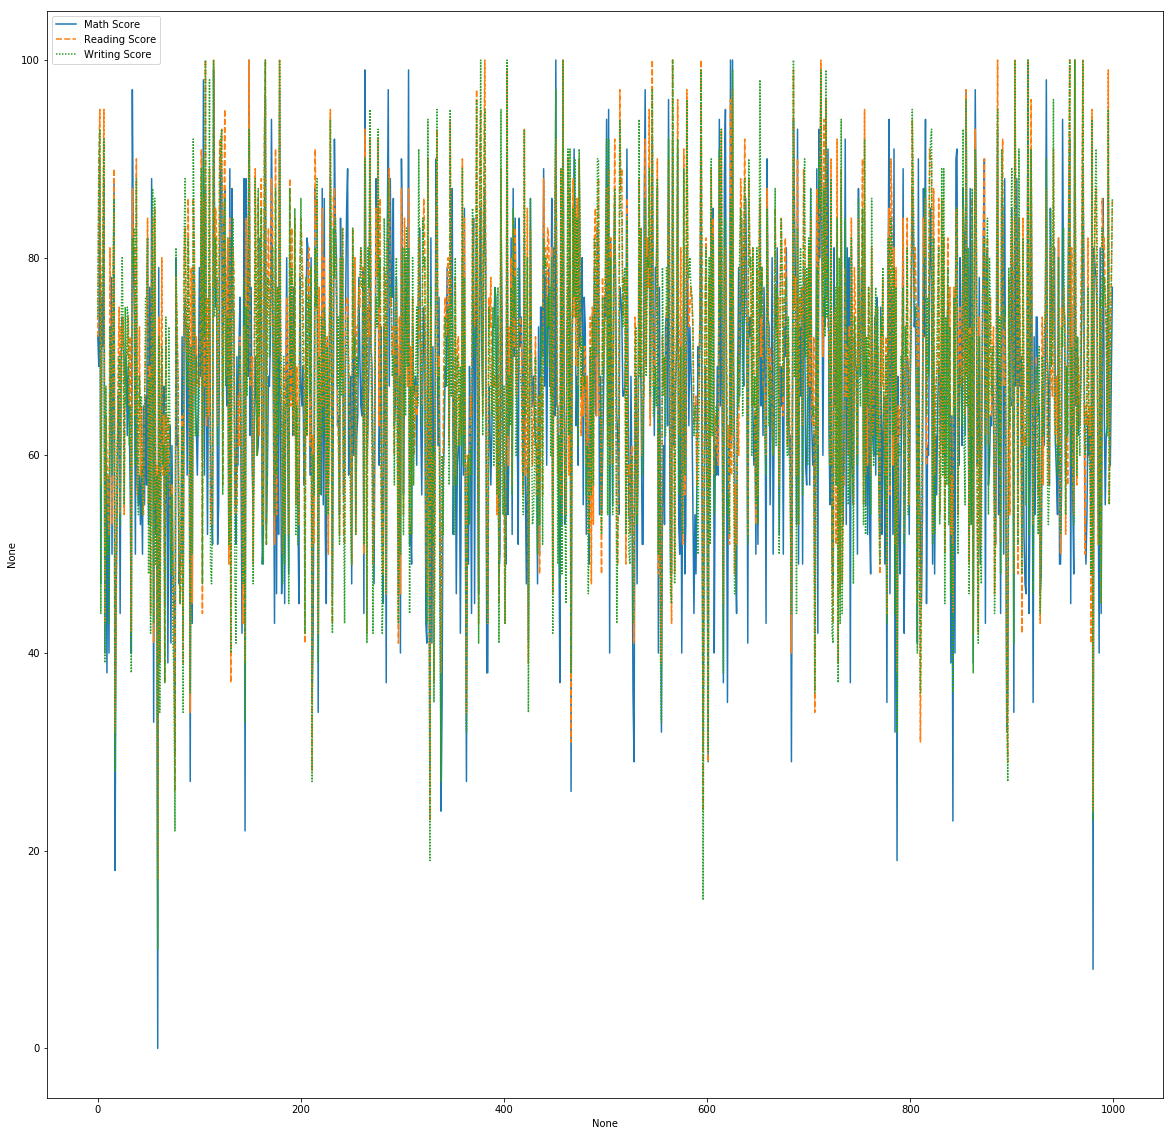

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
sns.lineplot(data=std.drop(['Course Completation', 'Group', 'Lunch', 'Education', 'Gender'], axis=1))

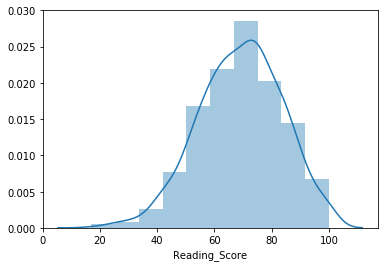

In [132]:
sns.distplot(std['Reading_Score'], bins = 10, kde = True)

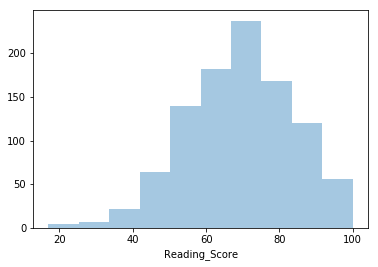

In [133]:
sns.distplot(std['Reading_Score'], bins = 10, kde = False)

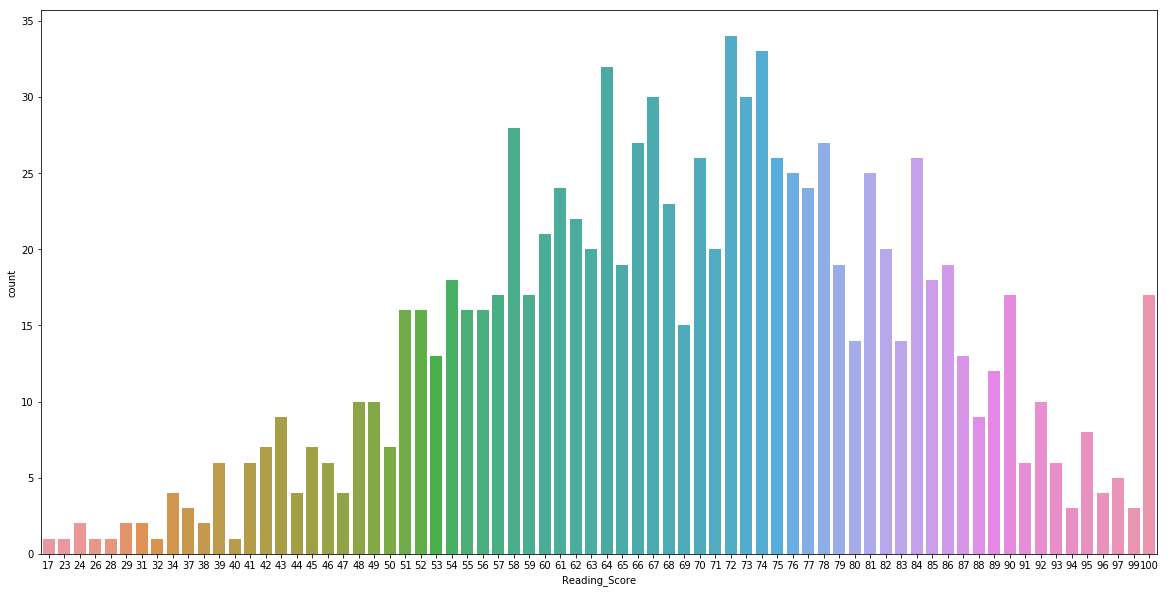

In [140]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(std['Reading_Score'])

<h1>Boxplot</h1>

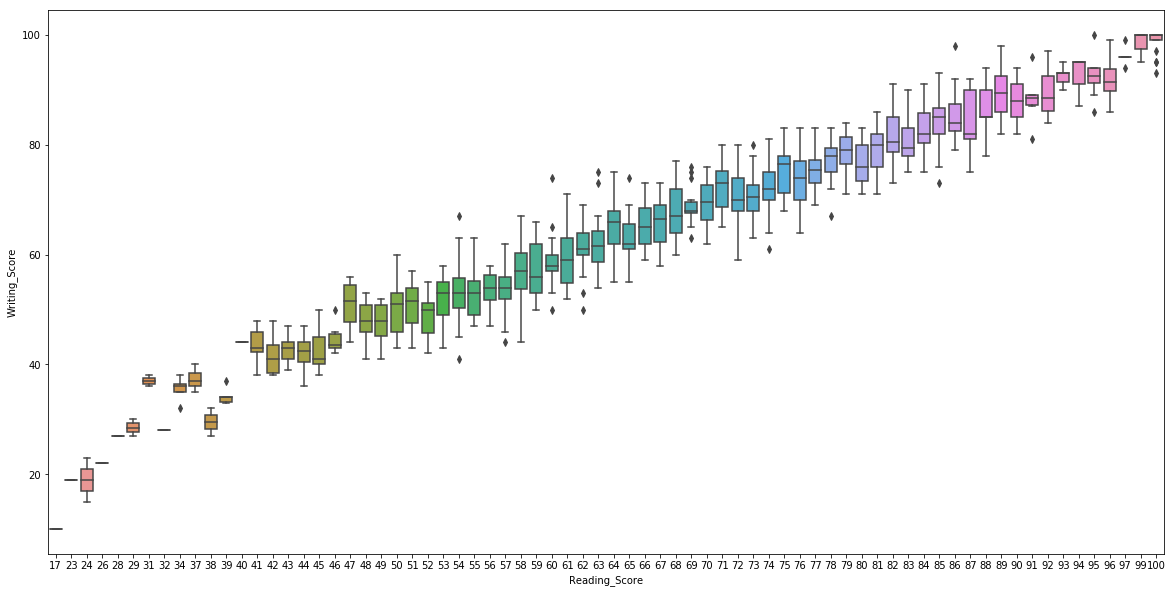

In [143]:
fig, ax = plt.subplots(figsize=(20,10))
df = std[(std['Reading_Score'] >= 10) & (std['Writing_Score'] < 1000)]
sns.boxplot('Reading_Score', 'Writing_Score', data = df)

<h1>Heatmap</h1>

In [145]:
corr = std.corr()
corr

,Math Score,Reading_Score,Writing_Score
Math Score,1.000000,0.817580,0.802642
Reading_Score,0.817580,1.000000,0.954598
Writing_Score,0.802642,0.954598,1.000000


[None, None, None, None, None, None]

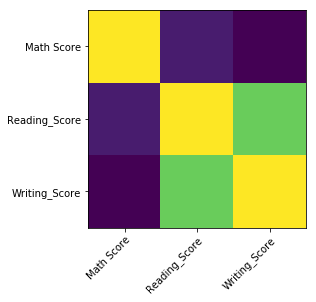

In [147]:
fig, ax = plt.subplots()
#create heatmap
im = ax.imshow(corr.values)

#set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

#Rotate the tick lables and set their alignment
plt.setp(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode='anchor')

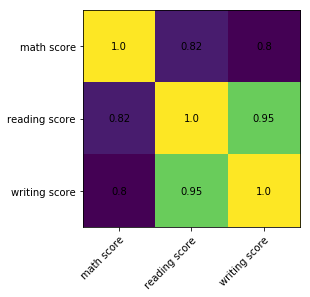

In [5]:
# get correlation matrix
corr = std.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

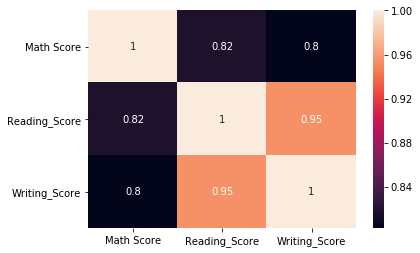

In [150]:
sns.heatmap(std.corr(), annot=True)

<h1>Pairplot</h1>

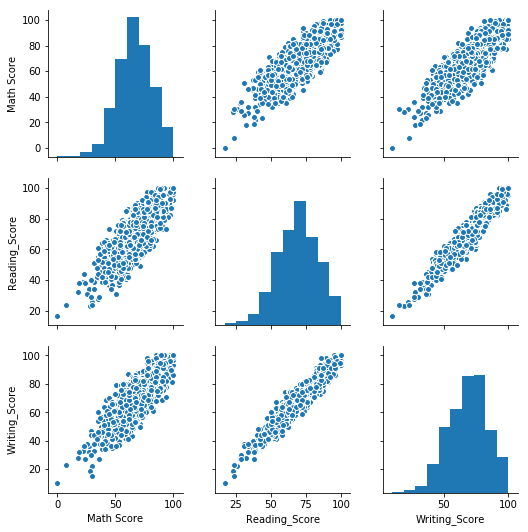

In [152]:
sns.pairplot(std)